# <b>Relátorio EP1: Cálculo do Conjunto de Mandelbrot em Paralelo com Pthreads e OpenMP</b>

<b>Augusto Camargo nUSP: 11891023</b><br>
<b>Henrique Gonçalves Salvador nUSP: 12415353</b><br>
<b>Ísis Ardisson Logullo nUSP: 7577410</b><br>
<b>Wesley Seidel Carvalho nUSP: 6544342</b> 

## 1. Introdução

<p>O Exercício-Programa 1 (EP1) foi separado em três implementações diferentes, sendo duas paralelas e uma sequencial para a construção das imagens de quatro regiões diferentes do Conjunto de Mandelbrot. Todos os experimentos foram executados na mesma máquina para manter a consistência dos dados comparativos das três versões. Para realização dos testes utilizamos um desktop com a seguinte configuração:</p>

<p>- CPU 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80 - 4.3 GHz<br>
- 16Gb de RAM<br>
- Sockets:  1<br>
- Cores:  4<br>
- Logical processors:  8 <br>
- Virtualization:  Enabled <br>
- L1 cache:  320 KB <br>
- L2 cache:  5,0 MB<br>
- L3 cache:  12,0 MB<br>
- Host: Windows 10 + WSL<br>
- Virtual host: Ubuntu 20.04 LTS<br>
- gcc version 9.3.0 (Ubuntu 9.3.0-17ubuntu1~20.04)</p>

<p>Para otimizar os executáveis foi utilizado a flag -O3 na compilação, comparativamente com outras flags, foi a que obteve um melhor ganho de performance nesses casos. Além disso, para compilar a versão sequencial foi necessário utlizar a flag -pthreads para a medição de tempo de execução de forma adequada. <br><br>
Para os experimentos foram adotadas as seguintes características:</p>
      <ul>
          <li>4 regiões diferentes (<i>Triple Spiral, Elephant, Seahorse e Full Picture</i>)</li>
          <li>tamanho das entradas $2^n$ com $4 \leq n \leq 13$</li>
          <li>Para as implementações com PThreads e OpenMP a variação de threads  $2^n$ com $0 \leq n \leq 5$ </li>
       </ul> 
Para classificar cada região do Conjunto de Mandelbrot em nossos CSVs, foi utilizado a seguinte codificação:<br>
 <ul>
  <li>"0": "Triple Spiral Valley" -> Parâmetros: -0.188 -0.012 0.554 0.754<br></li>
  <li>"1": "Elephant Valley" -> Parâmetros: 0.175 0.375 -0.1 0.1 11500<br></li>
  <li>"2": "Seahorse Valley" -> Parâmetros -> -0.8 -0.7 0.05 0.15<br></li>
  <li>"3": "Full Picture" -> Parâmetros: -2.5 1.5 -2.0 2.0 11500<br></li>
</ul> 

<p> Cada uma das variações foram executadas e medidas dez vezes. Para esta tarefa, foram implementados batchs (submetido no e-disciplinas no  .tar.gz), gerando como saída dois arquivos .CSV com todos os dados, o primeiro ("log_seq.csv") com as saídas dos experimentos da implementação sequencial e o segudo ("log_threads.csv") com as saídas dos processamentos das impletações paralelizadas (Pthreads e OpenMP). Para a implementação do batchs, utilizou-se o Python v.3.8.8. Os dados podem ser visualizados nessa tabela CSV em seguida:</p>

## 2. Resultados
### 2.1 Dados coletados

In [1]:
using DataFrames
using CSV
using PyPlot
using StatsPlots
using Statistics
using Plots

In [2]:
df_seq = DataFrame(CSV.File("log_seq.csv"))

,Comando,Tipo,Regiao,Tamanho,Thread
,String,String,Int64,Int64,Int64
1,./mandelbrot_pth -0.188 -0.012 0.554 0.754 16 1,SEQ,0,16,1
2,./mandelbrot_pth -0.188 -0.012 0.554 0.754 16 1,SEQ,0,16,1
3,./mandelbrot_pth -0.188 -0.012 0.554 0.754 16 1,SEQ,0,16,1
4,./mandelbrot_pth -0.188 -0.012 0.554 0.754 16 1,SEQ,0,16,1
5,./mandelbrot_pth -0.188 -0.012 0.554 0.754 16 1,SEQ,0,16,1
6,./mandelbrot_pth -0.188 -0.012 0.554 0.754 16 1,SEQ,0,16,1
7,./mandelbrot_pth -0.188 -0.012 0.554 0.754 16 1,SEQ,0,16,1
8,./mandelbrot_pth -0.188 -0.012 0.554 0.754 16 1,SEQ,0,16,1
9,./mandelbrot_pth -0.188 -0.012 0.554 0.754 16 1,SEQ,0,16,1


In [3]:
df_threads = DataFrame(CSV.File("log_threads.csv"))

,Comando,Tipo,Regiao,Tamanho,Thread
,String,String,Int64,Int64,Int64
1,./mandelbrot_omp -0.188 -0.012 0.554 0.754 16 1,OMP,0,16,1
2,./mandelbrot_pth -0.188 -0.012 0.554 0.754 16 1,PTH,0,16,1
3,./mandelbrot_omp -0.188 -0.012 0.554 0.754 16 1,OMP,0,16,1
4,./mandelbrot_pth -0.188 -0.012 0.554 0.754 16 1,PTH,0,16,1
5,./mandelbrot_omp -0.188 -0.012 0.554 0.754 16 1,OMP,0,16,1
6,./mandelbrot_pth -0.188 -0.012 0.554 0.754 16 1,PTH,0,16,1
7,./mandelbrot_omp -0.188 -0.012 0.554 0.754 16 1,OMP,0,16,1
8,./mandelbrot_pth -0.188 -0.012 0.554 0.754 16 1,PTH,0,16,1
9,./mandelbrot_omp -0.188 -0.012 0.554 0.754 16 1,OMP,0,16,1


Em seguida foram calculados, sobre os dados dos experimentos, a média,  o desvio padrão e o intervalo de confiança. Para o cálculo foram consideradas as 10 medições/execuções realizadas para cada experimento. Para o cálculo do intervalo de confiança de 95% utilizou-se a seguinte fórmula: $$\Bigg(\bar{x} -1,96 \times \frac{s}{\sqrt{n}},\quad  \bar{x} + 1,96 \times \frac{s}{\sqrt{n}}\Bigg)$$
<br>

Para verificação do intervalo de confiança a 95%, utilizou-se o tempo total das 10 execuções para cada conguração de algoritmo, região, tamanho da imagem e número de threads. Para as imagens menores, obervou-se um intervalo de confiança mais dilatado. Isso se deu por conta da representatividade do consumo de tempo das operações do Sistema Operacional em relação ao tempo total da execução, tendo em vista que o tempo para a execução do cálculo do Conjunto de Mondelbrot para imagens pequenas possui um tempo bastante reduzido. Os valores obtidos com os experimentos podem ser observados a seguir:

In [4]:
df_IC = DataFrame(CSV.File("00_log_OMP_PTH_SEQ_group_IntervaloConfianca.csv",  delim=',', decimal='.', ))
show(df_IC, allcols=true)

520×8 DataFrame
 Row │ algoritmo  regiao  tamanho  threads  total_mean  total_std    int_confianca_inf  int_confianca_sup 
     │ String     Int64   Int64    Int64    Float64     Float64      Float64            Float64           
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ OMP             0       16        1    0.00048   0.000322008        0.000280418        0.000679582
   2 │ OMP             0       16        2    0.024956  0.077797          -0.0232631          0.0731751
   3 │ OMP             0       16        4    0.024101  0.0748578         -0.0222963          0.0704983
   4 │ OMP             0       16        8    0.043786  0.0747786         -0.00256227         0.0901343
   5 │ OMP             0       16       16    0.032966  0.0712184         -0.0111756          0.0771076
   6 │ OMP             0       16       32    0.048555  0.147603          -0.0429302          0.14004
   7 │ OMP             0       32      

### Dataframes
Segue os filtros abaixo:

In [5]:
df_completo = DataFrame(CSV.File("01_log_OMP_PTH_SEQ_group_tudo.csv",  delim=',', decimal='.', ))
#show(df_completo, allcols=true)
df_seq = filter( x -> any(occursin.(["SEQ"], x.tipo)), df_completo)
df_omp = filter( x -> any(occursin.(["OMP"], x.tipo)), df_completo)
df_pth = filter( x -> any(occursin.(["PTH"], x.tipo)), df_completo)

show(df_seq, allcols=true)

40×12 DataFrame
 Row │ tipo    regiao  tamanho  threads  total_mean  total_std    write_mean  write_std    mondelbrot_mean  mondelbrot_std  image_buffer_mean  image_buffer_std 
     │ String  Int64   Int64    Int64    Float64     Float64      Float64     Float64      Float64          Float64         Float64            Float64          
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ SEQ          0       16        1    0.000465  5.44161e-5     8.6e-5    5.23238e-5          0.000346     3.80643e-5            2.9e-5         3.16228e-6
   2 │ SEQ          0       32        1    0.000935  3.47211e-5     9.8e-5    1.54919e-5          0.000786     2.63312e-5            4.1e-5         3.16228e-6
   3 │ SEQ          0       64        1    0.002963  4.78539e-5     0.000167  1.49443e-5          0.002678     3.79473e-5            0.000106       3.33999e-5
   4 │ SEQ          0   

### Gráficos
Os gráficos plotados abaixo mostram os comportamentos das três versões analisadas. Optamos por fazer minigraficos para termos um panorama geral do experimento. Omitimos a legenda do <b>eixo X (número de treads)</b> e do <b>eixo Y (segundos)</b> para evitar poluição visual

5200×12 DataFrame
  Row │ comando                            tipo    regiao  tamanho  threads  rodada  init     allocate  mandelbrot  write    total    qnt   
      │ String                             String  Int64   Int64    Int64    Int64   Float64  Float64   Float64     Float64  Float64  Int64 
──────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │ ./mandelbrot_pth -0.188 -0.012 0…  SEQ          0       16        1       0   1.0e-5   3.0e-5      0.0003   0.00022  0.00056      1
    2 │ ./mandelbrot_pth -0.188 -0.012 0…  SEQ          0       16        1       1   1.0e-5   3.0e-5      0.00034  0.00013  0.0005       1
    3 │ ./mandelbrot_pth -0.188 -0.012 0…  SEQ          0       16        1       2   1.0e-5   2.0e-5      0.00043  7.0e-5   0.00053      1
    4 │ ./mandelbrot_pth -0.188 -0.012 0…  SEQ          0       16        1       3   1.0e-5   3.0e-5      0.00038  7.0e-5   0.00048      1

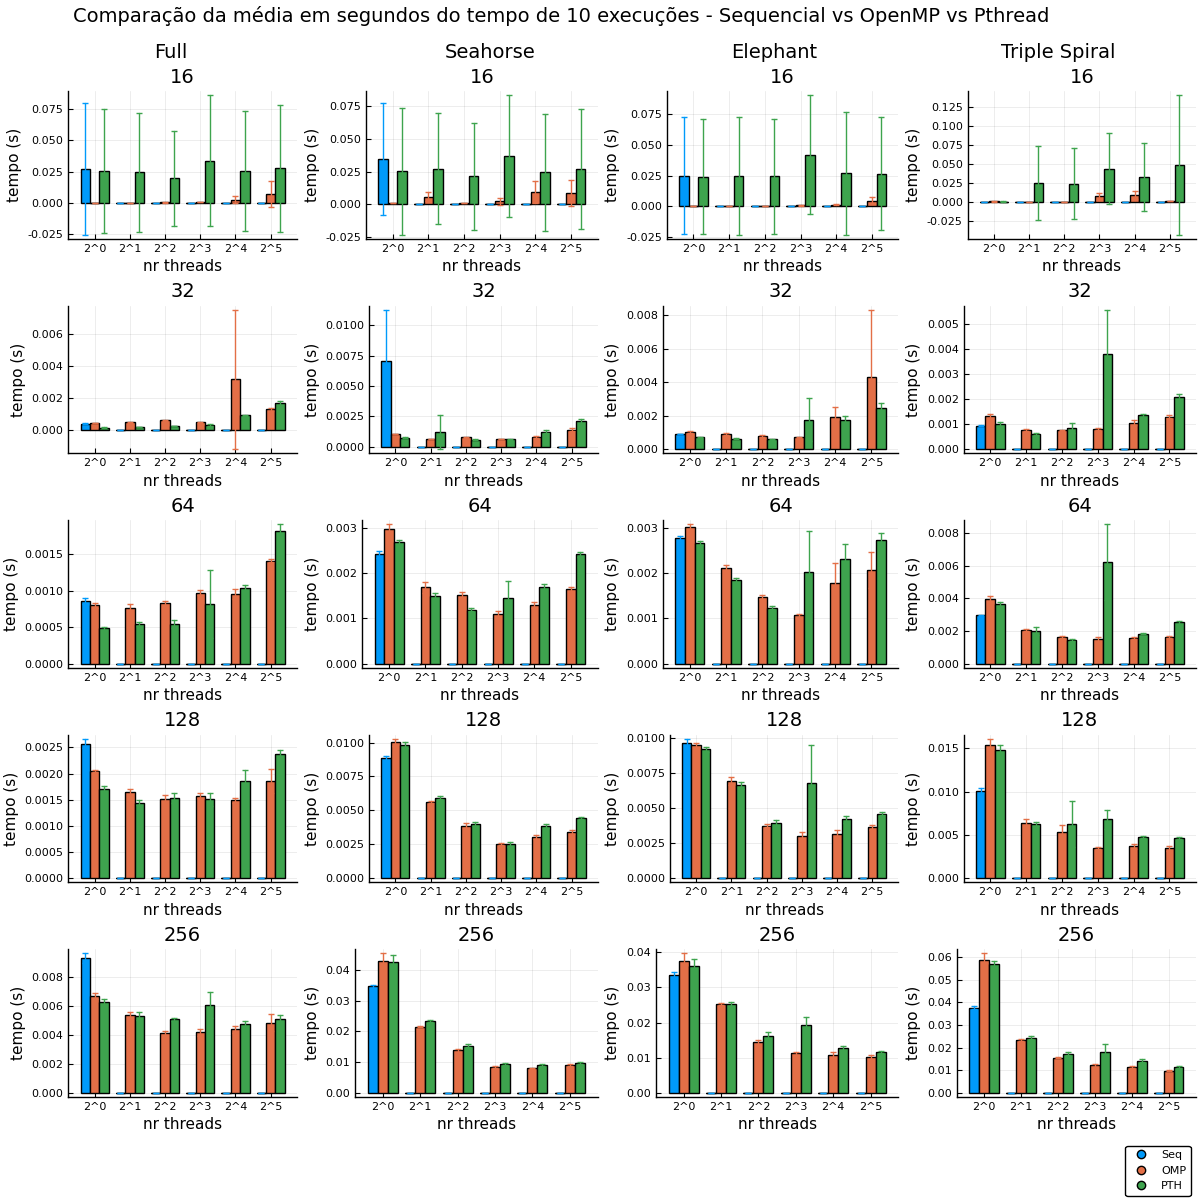

In [6]:
df_completo = DataFrame(CSV.File("log_completo.csv",  delim=';', decimal=',', ))
show(df_completo, allcols=true)

gdf = groupby(df_completo, ["regiao", "tipo", "threads", "tamanho"])
xxx = combine(gdf, :total => mean, :total => std)
xxx[!, :total_ic] = map((pmean, pstd) -> (1.96 * (pstd / sqrt(10))), xxx[:, :total_mean], xxx[:, :total_std])

# tam = 8192
# regiao = 3

function dados(tam, regiao)
    seq     = [xxx[ (xxx.regiao .== regiao) .& (xxx.tamanho .== tam) .& (xxx.tipo .== "SEQ") ,:][:,"total_mean"] zeros(5)']'
    seq_std = [xxx[ (xxx.regiao .== regiao) .& (xxx.tamanho .== tam) .& (xxx.tipo .== "SEQ") ,:][:,"total_ic"] zeros(5)']'
    pth     =  xxx[ (xxx.regiao .== regiao) .& (xxx.tamanho .== tam) .& (xxx.tipo .== "PTH") ,:][:,"total_mean"]
    pth_std =  xxx[ (xxx.regiao .== regiao) .& (xxx.tamanho .== tam) .& (xxx.tipo .== "PTH") ,:][:,"total_ic"]
    omp     =  xxx[ (xxx.regiao .== regiao) .& (xxx.tamanho .== tam) .& (xxx.tipo .== "OMP") ,:][:,"total_mean"]
    omp_std =  xxx[ (xxx.regiao .== regiao) .& (xxx.tamanho .== tam) .& (xxx.tipo .== "OMP") ,:][:,"total_ic"]
   [seq pth omp], [seq_std pth_std omp_std]
end


function list_base_tamanho(list_base_tamanho)
    graficos = []
#     for x in [4,5,6,7,8,9,10,11,12,13]
    for x in list_base_tamanho
        for regiao in [3 2 1 0]    
            tam = 2 ^ x
            a, b = dados(tam, regiao)
            g1 = groupedbar(
                ["2^0", "2^1", "2^2", "2^3", "2^4", "2^5"], 
                a, yerr = b,
                title = "$tam",
                xlabel = "nr threads", 
                ylabel = "tempo (s)",
                legend = false    
            )        
            push!(graficos, g1)
        end
    end
    graficos
end

function plt_media_e_intervalo(param_list_base_tamanho)

    tipos1 = ["Full" "Seahorse"  "Elephant"  "Triple Spiral"]
    t1 = [ 2^i for i in 4:13]

    title_subs = reshape([],1,0)
    for tam in t1
         for tipo in tipos1
            title_subs = [ title_subs "$(tam)" ]
         end
    end

    pyplot()

    # Figura com os resultado do seq em barra
    fig1 = total_plt = Plots.plot( list_base_tamanho(param_list_base_tamanho)... ,    layout = (5, 4) )


    # Titulo desenhado
    title_plt = Plots.scatter(
        [1, 1, 1, 1], 
        marker=0,
        markeralpha=0, 
        annotations=[
            (2.3, 1.8, Plots.text("Comparação da média em segundos do tempo de 10 execuções - Sequencial vs OpenMP vs Pthread")),
            (1.2, 1.1, Plots.text("Full")), 
            (2.1, 1.1, Plots.text("Seahorse")), 
            (2.9, 1.1, Plots.text("Elephant")), 
            (3.7, 1.1, Plots.text("Triple Spiral"))
            ],
        axis=false, 
        grid=false, 
        leg=false,
        size=(100,120)
    )

    # combine the 'title_plt' plot with your real plots
    total_plt = Plots.plot(
        title_plt,
        fig1,
        Plots.scatter((1:3)', xlim = (5,4), legend = true, framestyle = :none, label=["Seq" "OMP" "PTH"] ),
        layout=Plots.grid(3,1,heights=[0.05, 0.90, 0.05]),
    )
    total_plt
end

plt_media_e_intervalo(4:8)
plot!(size=(1200,1200))

## 3. Discussões

### 3.1 Número de Threads: Sequencial

<p>Começando com o método sequencial, temos sua maior vantagem de velocidade comparativamente aos métodos paralelos com apenas uma thread, em tamanhos grandes. Como podemos ver nos gráficos, em todas as regiões do Conjunto de Mandelbrot (<i>SeaHorse, Elephant, Triple Spiral e Full Picture</i>) o sequencial no mímino se iguala a alguns e em sua grande maioria é menor em tempo. O Pthread chega perto, o OMP acaba demorando um pouco (bem pouco) mais dos três analisando apenas uma thread. Isso se deve ao fato de os programas começarem a execução com uma única thread (denominada thread master). Quando a primeira região paralela é encontrada, a thread master cria as novas threads. Cada thread executa as sentenças que estão dentro da região paralela. No final da região paralela, a thread master espera pelo término das outras threads e continua então a execução de outras sentenças (DAGUM, 1998). No caso de uma thread apenas, isso acaba demorando mais, por conta de todo esse processo, e não tem ganho pois não há divisões do trabalho em outras threads, perdendo em tempo total de execução para a forma sequencial que executa seu processamento diretamente.<br>
<p>Olhando apenas para a versão sequencial, as regiões se comportam de formas distintas. Na região Full, o tamanho influencia no tempo exponencialmente. Porém diferente das outras três regiões o tempo é menor. Como o conjunto de Mandelbrot é um fractal no plano complexo, construido com sucessões recursivas, uma região ampliada requer mais recursividade por conta dos detalhes do que a região inteira, onde menos recursões já constrõem o fractal. As outras três regiões também seguem o padrão de crescimento exponencial de tempo conforme a variação do tamanho da imagem.</p>
<p>Quando olhamos o intervalo de confiança inferior e superior, aproximamos um pouco os tempos do sequencial com os tipos paralelizados de apenas uma thread. Por conta da intersecção dos inferiores de um com superiores do outro.</p>


In [7]:
df_seq = filter( x -> any(occursin.(["SEQ"], x.tipo)), df_completo)
df_omp = filter( x -> any(occursin.(["OMP"], x.tipo)), df_completo)
df_pth = filter( x -> any(occursin.(["PTH"], x.tipo)), df_completo)

df_tamanho8192 = filter(row -> row.tamanho == 8192, df_completo)
df_tamanho8192_r0 = filter(row -> row.regiao == 0, df_tamanho8192)
show(df_tamanho8192_r0, allcols=true)

130×12 DataFrame
 Row │ comando                            tipo    regiao  tamanho  threads  rodada  init     allocate  mandelbrot  write    total    qnt   
     │ String                             String  Int64   Int64    Int64    Int64   Float64  Float64   Float64     Float64  Float64  Int64 
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ ./mandelbrot_pth -0.188 -0.012 0…  SEQ          0     8192        1       0   1.0e-5   1.86567    37.115    1.29657  40.2772      1
   2 │ ./mandelbrot_pth -0.188 -0.012 0…  SEQ          0     8192        1       1   1.0e-5   1.41088    36.2347   1.2233   38.8689      1
   3 │ ./mandelbrot_pth -0.188 -0.012 0…  SEQ          0     8192        1       2   1.0e-5   1.42566    35.6572   1.23444  38.3173      1
   4 │ ./mandelbrot_pth -0.188 -0.012 0…  SEQ          0     8192        1       3   1.0e-5   1.42193    35.8968   1.24223  38.561       1
   5 │ 

### 3.2 Número de Threads: Pthreads & OpenMP

<p>Inserindo paralelização no programa, observou-se uma melhora considerável, comparativamente ao tempo sequencial. Ao papalelizar o código, o trabalho é dividido pelo diversos núcleos do processador e com isso, adotando as configurações necessárias, observa-se um ganho significativo em velocidade. Pthreads teve uma pequena vantagem sobre o OpenMP nos experimentos. Inicialmente em algumas regiões do Mandelbrot, ele começa um pouco na frente do que o OpenMP, mas conforme o tamanho aumenta eles vão ficando quase equivalentes e as curvas se tornam sobrepostas. Assim, com grandes números de dados (tamanho da imagem), há uma maior estabilidade das threads, levando o ganho do paralelismo.</p>
<p>O Pthreads se comporta de forma muito parecida em todas as regiões analisadas. Na Full Picture todo o processo acontece mais rápido, como comentado já anteriormente na parte sequencial. Mas olhando o escopo geral da forma do gráfico, ele tende a ficar uniforme e bem semelhante em todas as regiões. Se comportando de forma logarítmica, até se estabilizar no número  de threads "ideal" de aproveitamento máximo (platô).</p>
<p>As threads tem sua perda de escabilidade em entre $2^3$ e $2^4$, no estudo apresentado. Muito provavelmente associativo com o número (8) de processadores lógicos do computador usado. O uso do intervalo de confiança, confirma ainda mais toda a análise aproximando os resultados, evitando também possíveis inconsistências de ruídos pontuais.</p>
<p>Sobre o código desenvolvido, foi aproveitado a função Mandelbrot para que, após as adptações necessárias, se tornasse a função de chamada paralelizável em Pthreads. Essa abordagem pode ter contribuido para que o Pthreads obtivesse ligeira vantagem (inicial) sobre o OpenMP. Já que a estrutura de construção do Pthreads exige uma função de paralelização enquanto o OpenMP trabalha de forma interna sem precisar de uma função exclusiva, usando suas bibliotecas próprias. Mas isso também só é notado inicialmente em testes de volume menor de dados. Com tamanhos maiores de imagens o desempenho passa a se apresentar de forma semelhante.</p>
<p>Foram testadas algumas estratégias para paralelizar o código com o uso do OpenMP, de tal sorte que fosse possível reduzir o tempo total da execução. A estratégia que obteve melhor êxito foi dividir o cálculo de Mandelbrot em conjuntos de processamentos de forma equitativos. O melhor ajuste foi dividir o cálculo de Mandelbrot utilizando a configuração do Schedule do pragma como 'dynamic' e 'chunk' 16. Ao analisar o número de threads mais adequados para computar o Mandelbrot para o nosso equipamento, observou-se que houve ganho significativo ao adicionar threads até o número de 8 threads. Acima disso, os ganhos foram atenuados e permaneceram quase estáveis ao analisar 16 e 32 threads.</p>

### 3.3 Tamanho & Região

<p>O comportamento com relação ao tamanho da imagem a ser computada, observou-se que nos casos de imagens menores houve uma variação (desvio padrão) relevante no tempo de execução paralelizada,porém verificou-se que esta variação está relacionada outros fatores como a latência de recuperação de dados em memória e tempos de aberturar e fechamento de uma thread. Nos tamanhos de imagens menores, o tempo total de cálculo de Mandelbrot é reduzido e com isso os processos do Sistema Operacional passam a representar maior fatia do tempo total de processamento do cálculo de Mandelbrot. Porém ao analisar as imagens maiores, a curva tempo x Threads passa a sofrer menos oscilações bruscas e seu comportamento fica mais previsível.</p>

<p>Quanto a região do Conjunto de Mandelbrot, observou-se que o cálculo da <i>Triple Spiral Valley</i> foi a que teve o maior tempo de cálculo, já a <i>Full Picture</i> foi a região que teve o menor tempo total para concluir o processamento. As regiões que apresentaram maior ganho com a adoção de threads foi a <i>Triple Spiral Valley</i>, onde pode-se observar que a redução do tempo total da o seu processamento foi de maior relevância.</p>

<p>O OpenMP para imagens com 16x16 pixels apresenta desempenho inferior ao Pthreads. No entanto, conforme o tamanho da imagem aumenta, o tempo total de cálculo usando OpenMP se aproxima da curva do Pthreads. No geral,observou-se que o Pthreads obteve uma discreta vantagem em relação ao OpenMP em termos de desempenho (tempo total). Incluindo o intervalo de confiança a esse escopo, essa vantagem acaba quase que sumindo, tendendo ambos a ficarem semelhantes para imagens de tamanhos maiores.</p>


### 3.4 Operações de I/O e alocação de memória

<p>Com relação a alocação de memória (buffer) e escrita da imagem em arquivo, pode-se observar que houve uma variação considerável em função do tamanho da imagem a ser processada. Não houve variação considerável em relação ao fator região e nem do tipo de algoritmo utilizado, considerando os algoritmos sequencial, Pthreads e OpenMP. Isso ocorre pois a  locação de memória e a escrita da imagem em arquivo são partes não paralelizáveis da solução. Diferente do que o corre com o cálculo realizado no método que calcula o Conjunto de Mandelbrot (compute_mandelbrot), onde foi possível parelelizar o código e obter um ganho de desempenho, reduzindo o tempo total para realizar os cálculos.</p>
<p>Segue abaixo a tabela deixando isso mais perceptível:</p>

In [8]:
df_seq = filter( x -> any(occursin.(["SEQ"], x.tipo)), df_completo)
df_omp = filter( x -> any(occursin.(["OMP"], x.tipo)), df_completo)
df_pth = filter( x -> any(occursin.(["PTH"], x.tipo)), df_completo)

df_tamanho8192 = filter(row -> row.tamanho == 8192, df_completo)
df_tamanho8192_r0 = filter(row -> row.regiao == 0, df_tamanho8192)
show(df_tamanho8192_r0, allcols=true)

130×12 DataFrame
 Row │ comando                            tipo    regiao  tamanho  threads  rodada  init     allocate  mandelbrot  write    total    qnt   
     │ String                             String  Int64   Int64    Int64    Int64   Float64  Float64   Float64     Float64  Float64  Int64 
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ ./mandelbrot_pth -0.188 -0.012 0…  SEQ          0     8192        1       0   1.0e-5   1.86567    37.115    1.29657  40.2772      1
   2 │ ./mandelbrot_pth -0.188 -0.012 0…  SEQ          0     8192        1       1   1.0e-5   1.41088    36.2347   1.2233   38.8689      1
   3 │ ./mandelbrot_pth -0.188 -0.012 0…  SEQ          0     8192        1       2   1.0e-5   1.42566    35.6572   1.23444  38.3173      1
   4 │ ./mandelbrot_pth -0.188 -0.012 0…  SEQ          0     8192        1       3   1.0e-5   1.42193    35.8968   1.24223  38.561       1
   5 │ 

## 4. Perguntas Adicionais
### 4.1 O platô entre $2^3$ e $2^4$ threads é devido a Software ou Hardware?
<p>A perda de ganho de velocidade com o paralelismo aconteceu quando chegamos entre $2^3$ e $2^4$ threads. Ficou a dúvida se este limite havia sido atingido devido a configuração da máquina utilizada (4 cores e 8 processadores lógicos) ou por questões da implementação do paralelismo (algoritmo e API). Decidiu-se realizar um experimento em um novo hardware (6 cores e 12 processadores logicos) e mantendo a implementação do paralelismo. O resultado foi que mesmo com mais cores (e processadores) não tivemos ganho de escala, o platô atingindo em $2^4$ threads foi mantido. Conluímos que para novos ganhos de escala devemos mudar nossa implementação do paralelismo e não investir em mais processadores. Por outro lado, é provável que se adotássemos processamento em GPU este cenário poderia se modificar.</p>

### 4.3 Qual API é mais produtiva?
<p>Quanto a facilidade de implementação e clareza de código fonte o OpenMP obteve vantagem frente o Pthreads, propiciando maior produtividade na implementação da solução paralelizada.</p>

## 5. Conclusão
<p>As figuras de Madelbrot se mostraram um objeto interessante para testar recursos de paralelismo, elas conseguiram expor as sutilezas do comportamento do hardware, da linguagem de programação, das API de paralelismo e ainda do Sistema Operacional.</p>
<p>Otimizar o paralelismo é um desafio matricial: tem-se que levar em conta o conjunto quadrático formado pelas variáveis do problema.</p>
<p>Os resultados obtidos mostram que o uso pleno de um hardware atual requer o estudo e a aplicação de recursos de paralelismo, isso quando o objeto em questão o permitir, pois caso contrário uma quantidade grande de recuros computacionais que impactam na experiência do usário estarão sendo subutilizados.</p>
<p>A tecnologia utilizada de paralelismo mostrou-se com ótimo custo bebenefício: com pouco esforço de programação pudemos diminuir em até 5x o tempo para solução do problema. Também é preciso notar que ela deve ser usada com parcimonia, pois em alguns casos paralizar ou parelizar de mais acaba piorando o resultado do programa.</p>
<p>Acreditamos que ainda dominamos pouco a API do Pthreds e do OpenMP ao ponto de indicar um grande vencedor, o que nos leva ainda a ter que estudar mais a documentação e realizar novos experimentos pois com certeza baseando-se nos resultados obtidos nesse EP esse esforço adicional compensa.</p>

### 6. Referências Bibliográficas

DAGUM, Leonardo; ENON, Rameshm. OpenMP: an industry standard API for shared-memory
programming. Computational Science & Engineering, IEEE, n. 1, p. 46-55, 1998.